# Importing Modules and Checking Directory 

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
pd.__version__

'1.1.5'

In [3]:
os.getcwd()


'/Users/Livi/Projects/Black_mental_health/models'

In [4]:
original_med = pd.read_csv('../data/processed/medicare18.csv', dtype={'full_zip':'object', 'npi':'object'}, index_col=0)

/Users/Livi/opt/anaconda3/envs/springboard/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [5]:
original_med.head()

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,avg_beneficiary_age,avg_hcc_risk_score,medicare_payment_per_person,submitted_charges_per_person,services_per_person,submitted_charges_per_service,medicare_payment_per_service,percentage_rate,region,subregion
0,1003000126,I,21502,MD,US,Internal Medicine,Y,19,1218.0,445,...,76,2.2948,230.35,1556.49,2.74,568.67,84.16,0.147993,South,South Atlantic
1,1003006586,I,20832,MD,US,Internal Medicine,Y,16,1293.0,546,...,80,2.1736,207.08,485.81,2.37,205.14,87.44,0.426256,South,South Atlantic
2,1003006800,I,21202,MD,US,Physician Assistant,Y,4,58.0,12,...,65,0.8597,51.64,227.37,4.83,47.04,10.68,0.227106,South,South Atlantic
3,1003007816,I,20910,MD,US,Ophthalmology,Y,30,3417.0,791,...,79,1.2159,327.41,819.25,4.32,189.65,75.79,0.399647,South,South Atlantic
4,1003007824,I,21201,MD,US,Internal Medicine,Y,22,262.0,72,...,68,3.0926,220.59,489.58,3.64,134.54,60.62,0.450571,South,South Atlantic


In [6]:
original_med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115360 entries, 0 to 1115359
Data columns (total 24 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   npi                                  1115360 non-null  object 
 1   entity_code                          1115360 non-null  object 
 2   full_zip                             1115360 non-null  object 
 3   state                                1115360 non-null  object 
 4   country                              1115360 non-null  object 
 5   provider_type                        1115360 non-null  object 
 6   medicare_participation_indicator     1115360 non-null  object 
 7   number_of_hcpcs                      1115360 non-null  int64  
 8   number_of_services                   1115360 non-null  float64
 9   total_beneficiaries                  1115360 non-null  int64  
 10  total_submitted_charges              1115360 non-null  float64
 11

In [7]:
original_med.shape

(1115360, 24)

In [8]:
census = pd.read_csv('../data/processed/2018pops.csv', index_col = 0, dtype={'geo_id':'str'}, parse_dates=['do_date'])

In [9]:
census.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32799 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   geo_id                     32799 non-null  object        
 1   total_pop                  32799 non-null  int64         
 2   white_pop                  32799 non-null  int64         
 3   black_pop                  32799 non-null  int64         
 4   asian_pop                  32799 non-null  int64         
 5   hispanic_pop               32799 non-null  int64         
 6   amerindian_pop             32799 non-null  int64         
 7   other_race_pop             32799 non-null  int64         
 8   two_or_more_races_pop      32799 non-null  int64         
 9   do_date                    32799 non-null  datetime64[ns]
 10  percent_black              32799 non-null  float64       
 11  percent_white              32799 non-null  float64       
 12  perc

In [10]:
cols = ['geo_id', 'total_pop', 'percent_black', 'percent_white','percent_native_amer', 
        'percent_hispanic', 'percent_other','percent_asian', 'percent_two_or_more_races', 'majority']
keep_only = census.loc[:, cols]
keep_only.tail()

,geo_id,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
33115,35463,1794,0.323857,0.676143,0.000000,0.000000,0.000000,0.000000,0.000000,majority_white
33116,77664,2667,0.079865,0.828271,0.000000,0.069366,0.000000,0.009374,0.013123,majority_white
33117,21822,2013,0.169399,0.710879,0.017387,0.065574,0.000000,0.021361,0.015400,majority_white
33118,07418,2304,0.044271,0.904080,0.000000,0.043403,0.000000,0.008247,0.000000,majority_white
33119,03036,5039,0.003969,0.936098,0.000000,0.027783,0.006152,0.022028,0.003969,majority_white


In [11]:
original_med.full_zip.apply(len).value_counts(), census.geo_id.apply(len).value_counts()

(5    1115360
 Name: full_zip, dtype: int64,
 5    32799
 Name: geo_id, dtype: int64)

In [12]:
med = pd.merge(original_med, keep_only, how='left', left_on='full_zip', right_on='geo_id').drop(columns = 'geo_id')

In [13]:
original_med.shape, med.shape

((1115360, 24), (1115360, 33))

In [14]:
med.head()

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,subregion,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
0,1003000126,I,21502,MD,US,Internal Medicine,Y,19,1218.0,445,...,South Atlantic,42583.0,0.109645,0.839772,0.001573,0.018834,0.001127,0.007327,0.021464,majority_white
1,1003006586,I,20832,MD,US,Internal Medicine,Y,16,1293.0,546,...,South Atlantic,26448.0,0.108553,0.612523,0.003932,0.106360,0.006579,0.123299,0.038755,majority_white
2,1003006800,I,21202,MD,US,Physician Assistant,Y,4,58.0,12,...,South Atlantic,21010.0,0.579819,0.303475,0.002237,0.042075,0.006140,0.045740,0.017753,majority_black
3,1003007816,I,20910,MD,US,Ophthalmology,Y,30,3417.0,791,...,South Atlantic,42868.0,0.309042,0.448306,0.002659,0.135416,0.004689,0.067883,0.031539,no_majority
4,1003007824,I,21201,MD,US,Internal Medicine,Y,22,262.0,72,...,South Atlantic,17136.0,0.498833,0.337768,0.004260,0.039974,0.004785,0.079890,0.034022,no_majority


In [15]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115360 entries, 0 to 1115359
Data columns (total 33 columns):
 #   Column                               Non-Null Count    Dtype  
---  ------                               --------------    -----  
 0   npi                                  1115360 non-null  object 
 1   entity_code                          1115360 non-null  object 
 2   full_zip                             1115360 non-null  object 
 3   state                                1115360 non-null  object 
 4   country                              1115360 non-null  object 
 5   provider_type                        1115360 non-null  object 
 6   medicare_participation_indicator     1115360 non-null  object 
 7   number_of_hcpcs                      1115360 non-null  int64  
 8   number_of_services                   1115360 non-null  float64
 9   total_beneficiaries                  1115360 non-null  int64  
 10  total_submitted_charges              1115360 non-null  float64
 11

In [16]:
census.geo_id.isin(
    med[med.total_pop.isnull()].full_zip
        ).sum()

0

There may be new zip codes in 2018 Medicare that the 2018 Census estimates don't know about. Removing these rows with missing Census info.

In [17]:
idx = med[med.total_pop.isnull()].index
med.drop(index = idx, inplace=True)
med.shape

(1072142, 33)

In [18]:
med['percentage_rate'] = med['total_medicare_payment'] / med['total_allowed_payment']

Creating new classes based on 'percentage_rate' boxplot

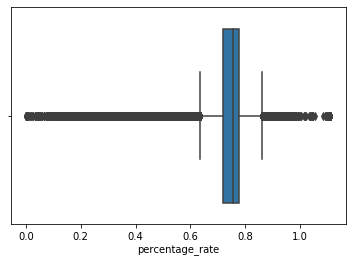

In [19]:
import seaborn as sns
z = sns.boxplot(med.percentage_rate)
plt.savefig('../reports/figures/boxplot.png')
z

Here are the quartiles and maximum.

In [20]:
first = np.quantile(med.percentage_rate, 0.25)
third = np.quantile(med.percentage_rate, 0.75)
high_cutoff = third + 1.5 * (third - first)
low_cutoff = first - 1.5 * (third - first)
low_cutoff, first, third, high_cutoff

(0.6362986583267458,
 0.7204316820656049,
 0.7765203645581776,
 0.8606533882970366)

What do the "Payments Per Service" look like for high payrate doctors? I would guess they should be low, which might explain why Medicare would pay almost 100% of the charges.

In [21]:
med[med.percentage_rate > high_cutoff].medicare_payment_per_service.describe()

count    58788.000000
mean        42.868352
std         62.490331
min          0.370000
25%         32.640000
50%         38.370000
75%         44.530000
max       6733.030000
Name: medicare_payment_per_service, dtype: float64

That's a pretty big difference between the third quartile and the max "Payment per service."

Curious about mostly covered expenses that are the most costly.

In [22]:
idx = med[med.percentage_rate > high_cutoff].index
med.loc[idx][med.loc[idx].medicare_payment_per_service > 3000]

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,subregion,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
169514,1962641563,O,19104,PA,US,Clinical Laboratory,Y,1,61.0,61,...,Middle Atlantic,54311.0,0.418810,0.345823,0.003646,0.050929,0.005376,0.140616,0.034358,no_majority
275254,1043344435,O,92121,CA,US,Clinical Laboratory,Y,4,2328.0,2317,...,Pacific,4655.0,0.014178,0.504404,0.000000,0.114501,0.001074,0.328679,0.036520,majority_white
287522,1184045619,O,94063,CA,US,Clinical Laboratory,Y,1,2835.0,2824,...,Pacific,34503.0,0.022520,0.191925,0.001246,0.672434,0.005130,0.080109,0.017448,majority_hispanic
290297,1215003603,O,94063,CA,US,Clinical Laboratory,Y,6,27852.0,27007,...,Pacific,34503.0,0.022520,0.191925,0.001246,0.672434,0.005130,0.080109,0.017448,majority_hispanic
341630,1770833121,O,92121,CA,US,Clinical Laboratory,Y,1,1416.0,1416,...,Pacific,4655.0,0.014178,0.504404,0.000000,0.114501,0.001074,0.328679,0.036520,majority_white
346069,1821253584,O,92618,CA,US,Clinical Laboratory,Y,2,3107.0,2710,...,Pacific,43316.0,0.026318,0.420191,0.001662,0.080525,0.005564,0.424070,0.041647,no_majority
803606,1508105024,O,98102,WA,US,Clinical Laboratory,Y,1,57.0,57,...,Pacific,25448.0,0.022124,0.738211,0.002240,0.044483,0.001611,0.127908,0.060083,majority_white
874560,1447774641,O,27709,NC,US,Clinical Laboratory,Y,1,42.0,42,...,South Atlantic,914.0,0.214442,0.657549,0.000000,0.015317,0.000000,0.053611,0.059081,majority_white
1006651,1770734253,O,85014,AZ,US,Clinical Laboratory,Y,2,2858.0,2829,...,Mountain,27395.0,0.055266,0.528454,0.038109,0.311006,0.000730,0.030626,0.035809,majority_white


In [23]:
med[med.percentage_rate < low_cutoff].medicare_payment_per_service.describe()

count    53477.000000
mean        36.637517
std         20.104761
min          0.000000
25%         24.090000
50%         35.130000
75%         47.200000
max       1007.130000
Name: medicare_payment_per_service, dtype: float64

Looking at the the cheaper samples in this class.

In [24]:
idx = med[med.percentage_rate < low_cutoff].index
med.loc[idx][med.loc[idx].medicare_payment_per_service < 5]

,npi,entity_code,full_zip,state,country,provider_type,medicare_participation_indicator,number_of_hcpcs,number_of_services,total_beneficiaries,...,subregion,total_pop,percent_black,percent_white,percent_native_amer,percent_hispanic,percent_other,percent_asian,percent_two_or_more_races,majority
3896,1164620977,I,20910,MD,US,Hematology-Oncology,Y,42,6000.0,29,...,South Atlantic,42868.0,0.309042,0.448306,0.002659,0.135416,0.004689,0.067883,0.031539,no_majority
4046,1174519417,I,20735,MD,US,Emergency Medicine,Y,19,272.0,33,...,South Atlantic,39323.0,0.832032,0.068967,0.001628,0.065788,0.001628,0.018030,0.011317,majority_black
6808,1285824284,I,21853,MD,US,Family Practice,Y,6,39.0,34,...,South Atlantic,11693.0,0.555717,0.398700,0.000000,0.016506,0.000342,0.015223,0.013512,majority_black
10406,1437563962,I,20814,MD,US,Emergency Medicine,Y,16,354.0,22,...,South Atlantic,28930.0,0.050881,0.731110,0.000933,0.086865,0.001832,0.099343,0.029036,majority_white
11241,1477594059,I,20706,MD,US,Emergency Medicine,Y,20,708.0,26,...,South Atlantic,42397.0,0.667028,0.059533,0.000731,0.211501,0.004623,0.037904,0.018681,majority_black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1108083,1831277029,I,82001,WY,US,Urology,Y,19,878.0,46,...,Mountain,36154.0,0.020440,0.797754,0.003623,0.131355,0.000000,0.012668,0.032251,majority_white
1108360,1962745257,I,82601,WY,US,Nurse Practitioner,Y,13,251.0,18,...,Mountain,28830.0,0.020222,0.845196,0.020049,0.086889,0.000000,0.007249,0.018904,majority_white
1110883,1598170839,I,57701,SD,US,Physician Assistant,Y,32,537.0,51,...,West North Central,45670.0,0.015130,0.715393,0.142347,0.057565,0.001270,0.016751,0.051369,majority_white
1112981,1164481107,I,99676,AK,US,Nurse Practitioner,Y,12,30.0,18,...,Pacific,1353.0,0.000000,0.899483,0.007391,0.008130,0.000000,0.001478,0.083518,majority_white


Creating payrate_level classes. Low is in the first quartile. Medium is in the IQR. High is in the fourth quartile. Very High includes the high outliers.

In [25]:
med['payrate_level'] = 'xx'
med.loc[med.percentage_rate < low_cutoff, 'payrate_level'] = 'very low'
med.loc[med.percentage_rate >= low_cutoff, 'payrate_level'] = 'low'
med.loc[med.percentage_rate >= first, 'payrate_level'] = 'medium'
med.loc[med.percentage_rate >= third, 'payrate_level'] = 'high'
med.loc[med.percentage_rate >= high_cutoff, 'payrate_level'] = 'very high'

In [26]:
med.payrate_level.value_counts()

medium       536070
low          214559
high         209248
very high     58788
very low      53477
Name: payrate_level, dtype: int64

Determining Collinearity Between Features. Not important for some kinds of classification, but it might affect my interpretation of results.

import seaborn as sns
plt.figure(figsize=(20, 20))
sns.heatmap(med.corr())

Looking at Collinearity Between Total Medicare Payment and Other Variables.

f, (ax1,ax2,ax3, ax4, ax5) = plt.subplots(1,5, sharey=True, figsize=(20, 5))
ax1.scatter('total_allowed_payment', 'total_medicare_payment', data=med, color='red', label='black');

ax2.scatter('total_beneficiaries', 'total_medicare_payment', data=med, color='blue', label='white');
ax3.scatter('total_medicare_standardized_payment', 'total_medicare_payment', data=med, color='blue', label='white');
ax4.scatter('number_of_services', 'total_medicare_payment', data=med, color='blue', label='white');
ax5.scatter('total_submitted_charges', 'total_medicare_payment', data=med, color='blue', label='white');




f.suptitle('Determining Collinearity between Percentage_rate and Medicare Payment Features');
ax1.set(xlabel='Total Allowed Payment', ylabel='Medicare Pay Rate');
ax2.set(xlabel='Total Beneficiaries')
ax3.set(xlabel = 'Total Medicare Standardized Payment')
ax4.set(xlabel = 'Number of Services')
ax5.set(xlabel = 'Total Submitted Charges')

plt.show()

I want to focus only on the percentage Medicare paid of the submitted charges to look for patterns in this rate that may have unintended correlations with demographics. Leaving actual payments in will make the model too good at predicting payrates. The heatmap shows the strong correlations between these and the Submitted Charges columns.

In [27]:
med.columns[med.columns.str.contains('medicare')]

Index(['medicare_participation_indicator', 'total_medicare_payment',
       'total_medicare_standardized_payment', 'medicare_payment_per_person',
       'medicare_payment_per_service'],
      dtype='object')

In [112]:
cols = list(med.columns[med.columns.str.contains('medicare')][1:])
cols = cols + ['npi','country', 'percentage_rate', 'total_allowed_payment','full_zip', 'medicare_participation_indicator']
df = med.drop(columns = cols)
df.columns

Index(['entity_code', 'state', 'provider_type', 'number_of_hcpcs',
       'number_of_services', 'total_beneficiaries', 'total_submitted_charges',
       'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'region', 'subregion', 'total_pop',
       'percent_black', 'percent_white', 'percent_native_amer',
       'percent_hispanic', 'percent_other', 'percent_asian',
       'percent_two_or_more_races', 'majority', 'payrate_level'],
      dtype='object')

There's also a high correlation between number of total_beneficiaries and total_submitted_charges. Depending on the kind of model I end up using, this may negatively impact my feature importances.

df.corr()[df.corr() > 0.8]

In [113]:
df.to_csv('../data/interim/features_and_target2_pre_get_dummies.csv')

Taking out zips before I one-hot-encode. Keeping them in may be useful for controlling for location / cost of living, but will also increase performance time.

In [30]:
y = df['payrate_level']
X = pd.get_dummies(df.drop(columns='payrate_level'))

X.columns = X.columns.str.replace('majority_majority_', 'majority_').str.replace('majority_no_', 'no_')
X.columns

Index(['number_of_hcpcs', 'number_of_services', 'total_submitted_charges',
       'avg_beneficiary_age', 'avg_hcc_risk_score',
       'submitted_charges_per_person', 'services_per_person',
       'submitted_charges_per_service', 'total_pop', 'percent_black',
       ...
       'subregion_Pacific', 'subregion_South Atlantic',
       'subregion_West North Central', 'subregion_West South Central',
       'majority_asian', 'majority_black', 'majority_hispanic',
       'majority_native_amer', 'majority_white', 'no_majority'],
      dtype='object', length=187)

#### Scaling ONLY CONTINUOUS columns using PowerTransformer

In [47]:
from sklearn.preprocessing import PowerTransformer
import time

start= time.time()

scaler = PowerTransformer()

X_scaled=X.copy()

for col in X.columns:
    if col =='entity_code_I':
        break
    else:
        scaler.fit(np.array(X_scaled[col]).reshape(-1,1))
        i_scaled = scaler.transform(np.array(X_scaled[col]).reshape(-1,1))
        X_scaled[col] = i_scaled
        
        
end= time.time()

print('Time scaled:', (end-start)/60, 'minutes.')

Time scaled: 0.6452015161514282 minutes.


In [48]:
X_scaled.head()

,number_of_hcpcs,number_of_services,total_submitted_charges,avg_beneficiary_age,avg_hcc_risk_score,submitted_charges_per_person,services_per_person,submitted_charges_per_service,total_pop,percent_black,...,subregion_Pacific,subregion_South Atlantic,subregion_West North Central,subregion_West South Central,majority_asian,majority_black,majority_hispanic,majority_native_amer,majority_white,no_majority
0,-0.003948,0.540055,1.196155,0.998501,1.105662,0.871076,-0.119979,1.063762,0.781846,0.413996,...,0,1,0,0,0,0,0,0,1,0
1,-0.170174,0.576787,0.573919,2.139463,0.994263,-0.276118,-0.317600,0.179416,-0.074416,0.402635,...,0,1,0,0,0,0,0,0,1,0
2,-1.402499,-1.478753,-2.079729,-1.181247,-1.398919,-1.041626,0.565058,-1.326987,-0.413310,1.867350,...,0,1,0,0,0,1,0,0,0,0
3,0.447350,1.158778,1.152199,1.833739,-0.416924,0.242840,0.442297,0.106138,0.795532,1.516602,...,0,1,0,0,0,0,0,0,0,1
4,0.139490,-0.443103,-0.657554,-0.706375,1.649911,-0.268393,0.241994,-0.223406,-0.679061,1.811638,...,0,1,0,0,0,0,0,0,0,1


In [91]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier()

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv = cross_val_score(rf, X_train[:10000], y_train[:10000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score:', rf_cv)
print("Time:", total/60, "minutes")

CV F1 Score: [0.59424076 0.59738251 0.58125621 0.60429822 0.57755221]
Time: 0.2782934824625651 minutes


Gradient Boosting

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc= cross_val_score(gbc,X_train[:10000],y_train[:10000],cv=5,scoring=scorer)


end = time.time()

print ('CV F1 Scores:', cv_scores_gbc)
print('Time:', (end-start)/60, 'minutes')

CV F1 Scores: [0.60312434 0.62045022 0.58340152 0.61170273 0.61353045]
Time: 2.668662349383036 minutes


Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression

start= time.time()

lr = LogisticRegression(max_iter=500)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr = cross_val_score(lr,X_train[:10000],y_train[:10000],cv=5,scoring=scorer)

end = time.time()

print ('CV F1 Scores:', cv_scores_lr)
print('Time:', (end-start)/60)

CV F1 Scores: [0.58929915 0.59869019 0.60013152 0.60664075 0.58938655]
Time: 0.2323078195254008


    I also tried deploying an SVC model but even when reducing the model to 5,000 entries, it was still fitting on training data 20 minutes later, so I decided that even a much better performance would not be worth the performance time when I would have to fit on 1,000,000 samples.

#### CV: Half Scaled and ONLY Selected Features

In [73]:
ridge_feats = pd.read_csv('../data/interim/ridge_features.csv',index_col=0)
kbest_feats = pd.read_csv('../data/interim/kbest_features.csv', index_col=0)
ridge_feats.head(1)

,0
provider_type_Registered Dietitian or Nutrition Professional,0.090226


In [74]:
kbest_feats.head(1)

,0
0,provider_type_Mass Immunizer Roster Biller


In [82]:
ridge_feats = list(ridge_feats.reset_index()['index'])
kbest_feats = list(kbest_feats['0'])

#### K Best Features

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[kbest_feats], y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier()

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv3 = cross_val_score(rf, X_train[:100000], y_train[:100000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score RF:', rf_cv3)
print("Time:", total/60, "minutes")

start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc3= cross_val_score(gbc,X_train[:10000],y_train[:10000],cv=5,scoring=scorer)


end = time.time()

print ('CV F1 Scores GBC:', cv_scores_gbc3)
print('Time:', (end-start)/60, 'minutes')

from sklearn.linear_model import LogisticRegression

start= time.time()

lr = LogisticRegression(max_iter=500)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr3 = cross_val_score(lr,X_train[:10000],y_train[:10000],cv=5,scoring=scorer)

end = time.time()

print ('CV F1 Scores LR:', cv_scores_lr3)
print('Time:', (end-start)/60)

CV F1 Score RF: [0.52296647 0.51856622 0.52146914 0.52428817 0.52079646]
Time: 0.4059203664461772 minutes
CV F1 Scores GBC: [0.52880339 0.52122645 0.53637345 0.52749809 0.53274528]
Time: 0.2726573665936788 minutes
CV F1 Scores LR: [0.52880339 0.52122645 0.5347799  0.52749809 0.53139514]
Time: 0.057468048731486004


#### Ridge Features

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled[ridge_feats], y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier()

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv4 = cross_val_score(rf, X_train[:100000], y_train[:100000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score RF:', rf_cv4)
print("Time:", total/60, "minutes")

start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc4= cross_val_score(gbc,X_train[:10000],y_train[:10000],cv=5,scoring=scorer)


end = time.time()

print ('CV F1 Scores GBC:', cv_scores_gbc4)
print('Time:', (end-start)/60, 'minutes')

from sklearn.linear_model import LogisticRegression

start= time.time()

lr = LogisticRegression(max_iter=500)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr4 = cross_val_score(lr,X_train[:10000],y_train[:10000],cv=5,scoring=scorer)

end = time.time()

print ('CV F1 Scores LR:', cv_scores_lr4)
print('Time:', (end-start)/60)

CV F1 Score RF: [0.47419517 0.4743125  0.47322537 0.47880334 0.47434894]
Time: 1.5162093838055928 minutes
CV F1 Scores GBC: [0.46267757 0.47684456 0.46017945 0.47206531 0.46309023]
Time: 0.3053579847017924 minutes
CV F1 Scores LR: [0.46883799 0.47710803 0.46632294 0.47379844 0.46578955]
Time: 0.04967144727706909


#### Doing CV again, but WITH SCALING the binary columns

In [54]:
start= time.time()

scaler = PowerTransformer()
scaler.fit(X)
X_scaled2 = scaler.transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled2, y, test_size = 0.2, random_state=42)

In [55]:
end = time.time()
print('time:', (end-start)/60, 'minutes')

time: 5.403771114349365 minutes


In [59]:
pd.DataFrame(X_scaled2, columns = X.columns).head(1)

,number_of_hcpcs,number_of_services,total_submitted_charges,avg_beneficiary_age,avg_hcc_risk_score,submitted_charges_per_person,services_per_person,submitted_charges_per_service,total_pop,percent_black,...,subregion_Pacific,subregion_South Atlantic,subregion_West North Central,subregion_West South Central,majority_asian,majority_black,majority_hispanic,majority_native_amer,majority_white,no_majority
0,-0.003948,0.540055,1.196155,0.998501,1.105662,0.871076,-0.119979,1.063762,0.781846,0.413996,...,-0.378901,2.036056,-0.285347,-0.331112,-0.0744,-0.225179,-0.234267,-0.033669,0.585053,-0.416918


#### All feats

In [60]:
rf = RandomForestClassifier(n_jobs=-1)

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv2 = cross_val_score(rf, X_train[:10000], y_train[:10000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score:', rf_cv2)
print("Time:", total/60, "minutes")

CV F1 Score: [0.59442875 0.59819854 0.58825693 0.59105585 0.58465995]
Time: 0.29118598302205406 minutes


In [61]:
start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc2= cross_val_score(gbc,X_train[:10000],y_train[:10000],cv=5,scoring=scorer, n_jobs=-1)


end = time.time()

print ('CV F1 Scores:', cv_scores_gbc2)
print('Time:', (end-start)/60)

CV F1 Scores: [0.60216655 0.62087833 0.58549564 0.6101887  0.61516353]
Time: 2.4778101682662963


In [62]:
start= time.time()

lr = LogisticRegression(n_jobs=-1)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr2 = cross_val_score(lr,X_train[:10000],y_train[:10000],cv=5,scoring=scorer, n_jobs=-1)

end = time.time()

print ('CV F1 Scores:', cv_scores_lr2)
print('Time:', (end-start)/60)

CV F1 Scores: [0.58979856 0.5984632  0.59820224 0.6061071  0.58988418]
Time: 0.06464208364486694


#### Kbest Feats

In [108]:
X_scaled2 = pd.DataFrame(X_scaled2, columns = X.columns)
X_train, X_test, y_train, y_test = train_test_split(X_scaled2[kbest_feats], y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier()

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv5 = cross_val_score(rf, X_train[:100000], y_train[:100000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score RF:', rf_cv5)
print("Time:", total/60, "minutes")

start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc5= cross_val_score(gbc,X_train[:100000],y_train[:100000],cv=5,scoring=scorer)


end = time.time()

print ('CV F1 Scores GBC:', cv_scores_gbc5)
print('Time:', (end-start)/60, 'minutes')

from sklearn.linear_model import LogisticRegression

start= time.time()

lr = LogisticRegression(max_iter=500)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr5 = cross_val_score(lr,X_train[:100000],y_train[:100000],cv=5,scoring=scorer)

end = time.time()

print ('CV F1 Scores LR:', cv_scores_lr5)
print('Time:', (end-start)/60)

CV F1 Score RF: [0.52296647 0.51856622 0.52146914 0.52428817 0.52079646]
Time: 0.3692087690035502 minutes
CV F1 Scores GBC: [0.52296647 0.51856622 0.52146914 0.52428817 0.52079646]
Time: 2.4240289171536764 minutes
CV F1 Scores LR: [0.52296647 0.51856622 0.52146914 0.52428817 0.52079646]
Time: 0.496477480729421


#### Ridge Feats

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled2[ridge_feats], y, test_size = 0.2, random_state=42)

rf = RandomForestClassifier()

start = time.time()

scorer = make_scorer(f1_score, average = 'weighted')
rf_cv6 = cross_val_score(rf, X_train[:100000], y_train[:100000], cv=5, scoring=scorer)

end= time.time()
total = end - start

print('CV F1 Score RF:', rf_cv6)
print("Time:", total/60, "minutes")

start = time.time()

gbc = GradientBoostingClassifier()
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_gbc6= cross_val_score(gbc,X_train[:100000],y_train[:100000],cv=5,scoring=scorer)


end = time.time()

print ('CV F1 Scores GBC:', cv_scores_gbc6)
print('Time:', (end-start)/60, 'minutes')

from sklearn.linear_model import LogisticRegression

start= time.time()

lr = LogisticRegression(max_iter=500)
scorer = make_scorer(f1_score, average = 'weighted')
cv_scores_lr6 = cross_val_score(lr,X_train[:100000],y_train[:100000],cv=5,scoring=scorer)

end = time.time()

print ('CV F1 Scores LR:', cv_scores_lr6)
print('Time:', (end-start)/60)

CV F1 Score RF: [0.47415974 0.47218686 0.47362479 0.47915108 0.47354599]
Time: 1.3058063507080078 minutes
CV F1 Scores GBC: [0.4604279  0.45706118 0.4599994  0.46110714 0.45985048]
Time: 3.534658714135488 minutes
CV F1 Scores LR: [0.46035023 0.45715765 0.46022398 0.46136849 0.45938331]
Time: 0.4018767992655436


#### Model Metrics

In [110]:
pd.DataFrame({'models':['Random Forest','Gradient Boosting','Logistic Regression'],
             'CV: Scale1, all feats': [rf_cv.mean(), cv_scores_gbc.mean(), cv_scores_lr.mean()],
             'CV: Scale1, kbest' : [rf_cv3.mean(), cv_scores_gbc3.mean(), cv_scores_lr3.mean()], 
            'CV: Scale1, ridge feats' : [rf_cv4.mean(), cv_scores_gbc4.mean(), cv_scores_lr4.mean()], 
             'CV: Scale2, all feats' : [rf_cv2.mean(), cv_scores_gbc2.mean(), cv_scores_lr2.mean()], 
             'CV: Scale2, kbest feats' : [rf_cv5.mean(), cv_scores_gbc5.mean(), cv_scores_lr5.mean()],
            'CV: Scale2, ridge feats' : [rf_cv6.mean(), cv_scores_gbc6.mean(), cv_scores_lr6.mean()], 
             
             })

,models,"CV: Scale1, all feats","CV: Scale1, kbest","CV: Scale1, ridge feats","CV: Scale2, all feats","CV: Scale2, kbest feats","CV: Scale2, ridge feats"
0,Random Forest,0.590946,0.530178,0.474977,0.591320,0.521617,0.474534
1,Gradient Boosting,0.606442,0.529329,0.466971,0.606779,0.521617,0.459689
2,Logistic Regression,0.596830,0.528741,0.470371,0.596491,0.521617,0.459697


    My models types all performed pretty similarly. I might want to include all of them in my final modeling document, but if I use ALL features, GBC will take significantly longer for what looks like a very slight performance edge.
    
    If I do limit the features, I may want to use KBest features rather than Ridge features, because they scored much better. The models with limited features performed much worse than the ones with all features.
    
    The two scalers were very similar. But the 1st method was significantly faster (not scaling the binary columns) so this may be preferable.

    I am interested in the F1 Score particularly for the "very high" class and "very low" class because I want to know whether the model falsely labels high-rate providers as very low or vice versa. Those outliers may be worth examining. 

    Overall, my modeling notebook will focus most heavily of feature importances and tables that contain the extreme outliers: low rate providers labeled as 'very high' and very high rate providers labeled as very low. I want to see if these providers show a pattern. 

    If they do seem fishy, a final iteration of modeling may be one that labels these outliers as "wrongly compensated" and trains on the data to look for other potential "wrongly compensated" providers. 